11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


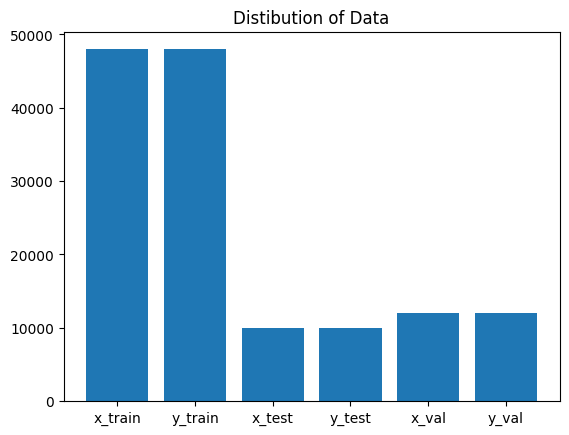

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


labels = ['x_train', 'y_train', 'x_test', 'y_test', 'x_val', 'y_val']
values = [len(x_train), len(y_train), len(x_test), len(y_test), len(x_val), len(y_val)]

plt.bar(labels, values)
plt.title('Distibution of Data')
plt.show()


In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(rate=0.4),
    layers.Dense(10, activation="softmax")
])



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the target variables
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)


history = model.fit(x_train, y_train_encoded, epochs=5, batch_size=64, validation_data=(x_val, y_val_encoded))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7501 - loss: 2.2601 - val_accuracy: 0.9751 - val_loss: 0.0856
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9566 - loss: 0.1477 - val_accuracy: 0.9757 - val_loss: 0.0827
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9689 - loss: 0.1062 - val_accuracy: 0.9825 - val_loss: 0.0657
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9751 - loss: 0.0856 - val_accuracy: 0.9854 - val_loss: 0.0535
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9799 - loss: 0.0668 - val_accuracy: 0.9854 - val_loss: 0.0569


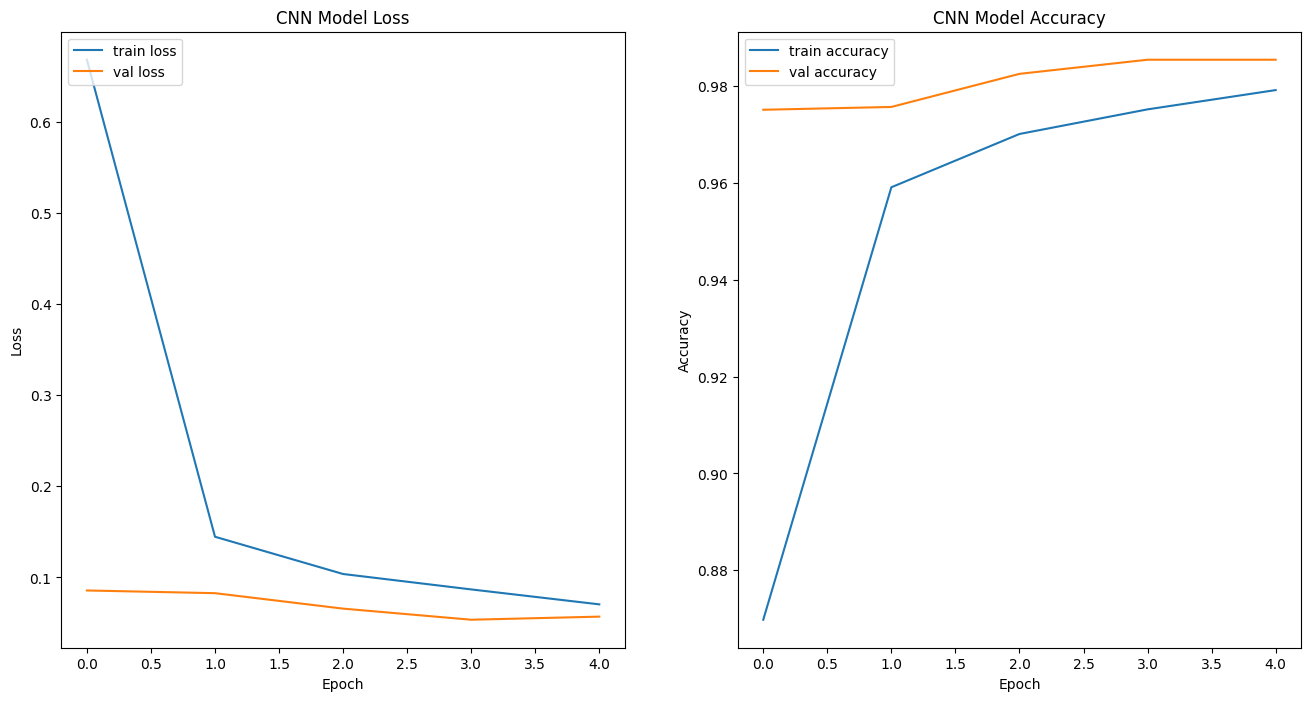

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9804 - loss: 0.0751
Testing Loss:		 0.059476982802152634
Testing Accuracy:	 98.47999811172485


In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('CNN Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(history.history['accuracy'], label='train accuracy')
ax[1].plot(history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('CNN Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.show()

# One-hot encode y_test before evaluation
y_test_encoded = to_categorical(y_test)

loss, acc = model.evaluate(x_test, y_test_encoded)

print("Testing Loss:\t\t", loss)
print("Testing Accuracy:\t", acc*100)